<a href="https://colab.research.google.com/github/Fcazarez/RRC3_UML_Ass2_Hierarchical_Classification/blob/main/Assigment2_Hierarchical_Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **COMP-3704 (241552) Unsupervised Machine Learning**
## **Assignment 2: Hierarchical Clasification**
### **Felix Cazarez**

### Objective:
To segment customers into groups for a targeted marketing strategy.

### Data:
Obtained from Credit Card Dataset for Clustering | Kaggle, original source unknown.

### Problem Statement:
The marketing department for a credit card company wants to learn more about the different kinds of customers they have in order to develop a marketing strategy that targets each group separately. As a data scientist, your job is to find the best way to divide the customers into groups, and to develop a description of each group to be used by the marketing strategists.

### Steps to be completed:
Create a Jupyter notebook and complete the following steps:


### **Data**
**a)**
* Load CC General.csv into a pandas dataframe. Print out the header. Use pandas.DataFrame.describe to summarize the data. Using markdown, explain the meaning of each column and make observations about the dataset.


In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering



In [ ]:
# Import database using github link
url = "https://raw.githubusercontent.com/Fcazarez/RRC3_UML_Ass2_Hierarchical_Classification/main/CC%20GENERAL.csv"
df = pd.read_csv(url, encoding="unicode_escape")
# take a look at the data
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
# review the data frame at first glance
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Comments:
First column is categorical
Tenure and Transactions are integer
Data set is a group of features about people who purchase with credit card

The description of each feature is the next:

| Column                      | Description                                                                                          |
|-----------------------------|------------------------------------------------------------------------------------------------------|
| CUST_ID                     | Customer Card ID                                             |
| BALANCE                     | Money in the credit card to purchase                                                 |
| BALANCE_FREQUENCY           | How frequently the balance is updated (1 = frequently, 0 = not frequently) |
| PURCHASES                   | Amount of purchases                                                           |
| ONEOFF_PURCHASES            | Maximum expended amount                                                             |
| INSTALLMENTS_PURCHASES      | Amount of purchases made in installments                                                             |
| CASH_ADVANCE                | Cash in advance used                                                                  |
| PURCHASES_FREQUENCY         | How frequently the purchases are being made, (1 = frequently, 0 = not frequently) |
| ONEOFF_PURCHASES_FREQUENCY  | How frequently one-off purchases are happening (1 = frequently, 0 = not frequently) |
| PURCHASES_INSTALLMENTS_FREQUENCY | How frequently purchases in installments are being done, (1 = frequently, 0 = not frequently) |
| CASH_ADVANCE_FREQUENCY      | How frequently the cash in advance is being paid, (1 = frequently, 0 = not frequently)                         |
| CASH_ADVANCE_TRX            | Number of transactions made with "Cash in Advance"                                                    |
| PURCHASES_TRX               | Number of transactions made to purchase                                                              |
| CREDIT_LIMIT                | Limit of Credit Card for the customer                                                                   |
| PAYMENTS                    | Amount of Payment done by the customer                                                                 |
| MINIMUM_PAYMENTS            | Minimum amount of payments made by the customer                                                         |
| PRC_FULL_PAYMENT            | Percent of full payment paid by the customer                                                             |
| TENURE                      | Tenure of credit card service for the customer                                                           |
* Note: Scores between 0 and 1 are not discrete varibles, the values are continuous in that range

### **Data**
**b)**
* Use pandas.DataFrame.info to check if the entries are the correct datatype, and if there are any missing values.
* Use pandas.DataFrame.duplicates to check for duplicate entries.
* Fix the dataset so that there are no missing values, duplicate rows, or incorrect data types.
* Use markdown to make observations and explain what you have done.

Lets check dispersion with interquatile range and variation coeficient

In [ ]:
# variation coeficient and interquartile range
var_coef = lambda x: np.std(x, ddof=1) / np.mean(x) * 100
var_coef = lambda x: ( x['std'] / x['mean'] ) * 100
i_range = lambda x: ( x['max'] / x['min'] )

stats = df.describe()
cvs = stats.apply(var_coef)
max_min = stats.apply(i_range)
stats.loc['var_coef'] = cvs
stats.loc['i_range'] = max_min
stats

c:\Users\Felix C\anaconda3\envs\UML\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count     8.950000e+03        8950.000000  8.950000e+03      8.950000e+03   
mean      1.564475e+03           0.877271  1.003205e+03      5.924374e+02   
std       2.081532e+03           0.236904  2.136635e+03      1.659888e+03   
min       0.000000e+00           0.000000  0.000000e+00      0.000000e+00   
25%       1.282819e+02           0.888889  3.963500e+01      0.000000e+00   
50%       8.733852e+02           1.000000  3.612800e+02      3.800000e+01   
75%       2.054140e+03           1.000000  1.110130e+03      5.774050e+02   
max       1.904314e+04           1.000000  4.903957e+04      4.076125e+04   
var_coef  1.330499e+02          27.004663  2.129809e+02      2.801795e+02   
i_range            inf                inf           inf               inf   

          INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count               8.950000e+03  8.950000e+03          8950.000000   
mean                4.110676e+02  9.788711e+02             0.490351   
std                 9.043381e+02  2.097164e+03             0.401371   
min                 0.000000e+00  0.000000e+00             0.000000   
25%                 0.000000e+00  0.000000e+00             0.083333   
50%                 8.900000e+01  0.000000e+00             0.500000   
75%                 4.686375e+02  1.113821e+03             0.916667   
max                 2.250000e+04  4.713721e+04             1.000000   
var_coef            2.199974e+02  2.142431e+02            81.853839   
i_range                      inf           inf                  inf   

          ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                    8950.000000                       8950.000000   
mean                        0.202458                          0.364437   
std                         0.298336                          0.397448   
min                         0.000000                          0.000000   
25%                         0.000000                          0.000000   
50%                         0.083333                          0.166667   
75%                         0.300000                          0.750000   
max                         1.000000                          1.000000   
var_coef                  147.357245                        109.057919   
i_range                          inf                               inf   

          CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
count                8950.000000       8950.000000    8950.000000   
mean                    0.135144          3.248827      14.709832   
std                     0.200121          6.824647      24.857649   
min                     0.000000          0.000000       0.000000   
25%                     0.000000          0.000000       1.000000   
50%                     0.000000          0.000000       7.000000   
75%                     0.222222          4.000000      17.000000   
max                     1.500000        123.000000     358.000000   
var_coef              148.079894        210.064960     168.986624   
i_range                      inf               inf            inf   

          CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
count      8949.000000  8.950000e+03      8.637000e+03       8950.000000   
mean       4494.449450  1.733144e+03      8.642065e+02          0.153715   
std        3638.815725  2.895064e+03      2.372447e+03          0.292499   
min          50.000000  0.000000e+00      1.916300e-02          0.000000   
25%        1600.000000  3.832762e+02      1.691237e+02          0.000000   
50%        3000.000000  8.569015e+02      3.123439e+02          0.000000   
75%        6500.000000  1.901134e+03      8.254855e+02          0.142857   
max       30000.000000  5.072148e+04      7.640621e+04          1.000000   
var_coef     80.962435  1.670412e+02      2.745231e+02        190.287132   
i_range     600.000000           inf      3.987174

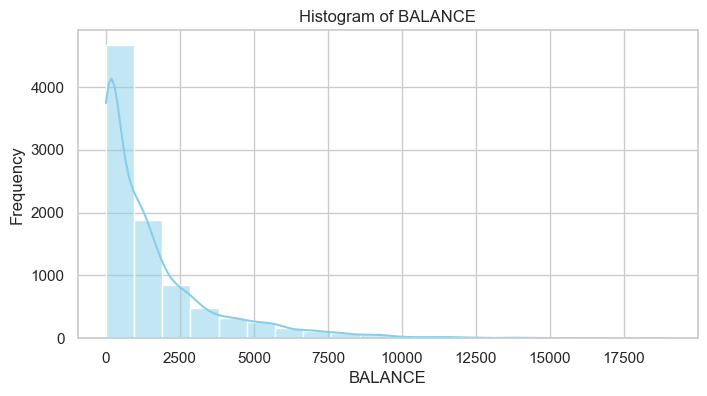

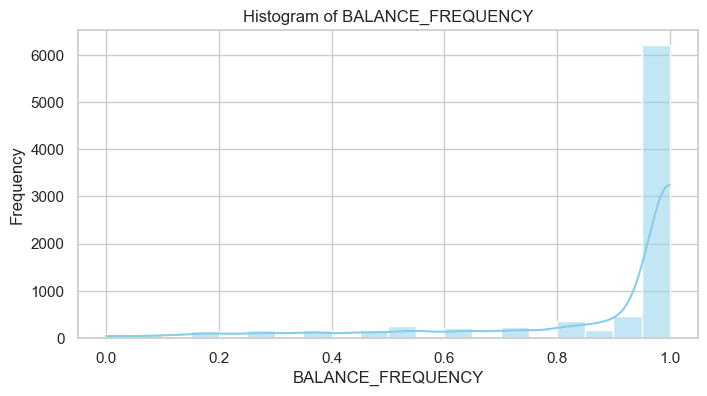

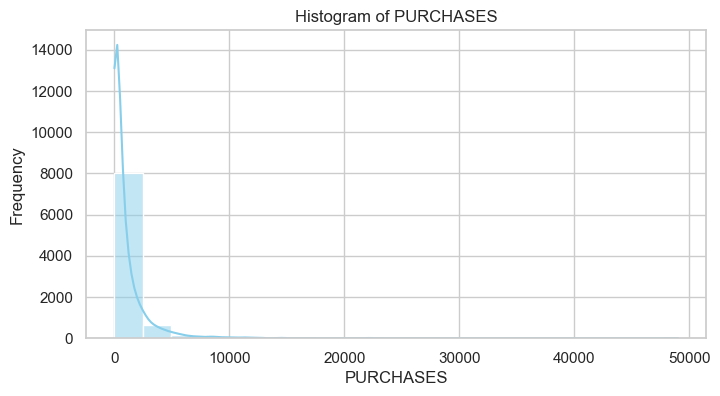

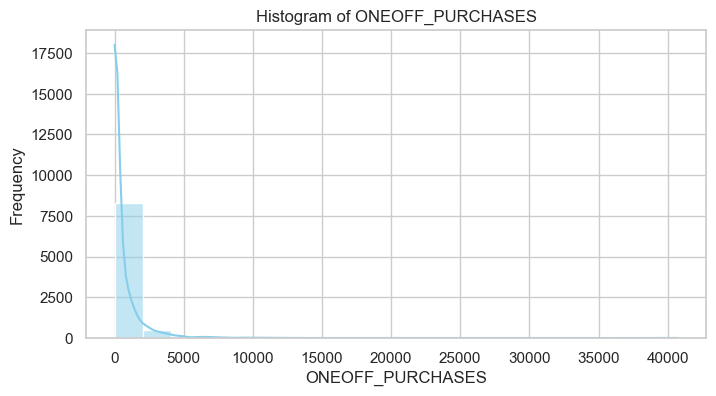

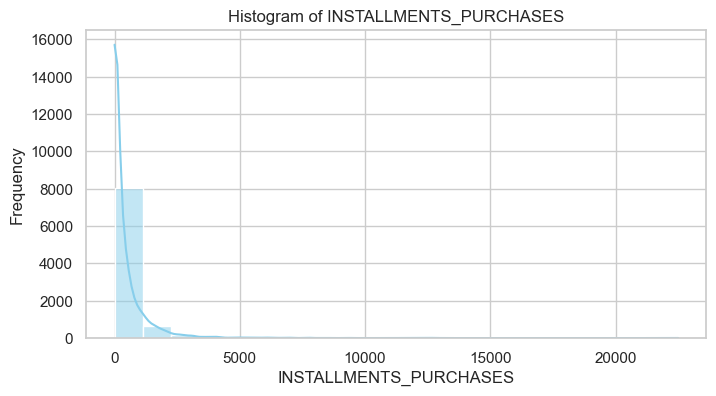

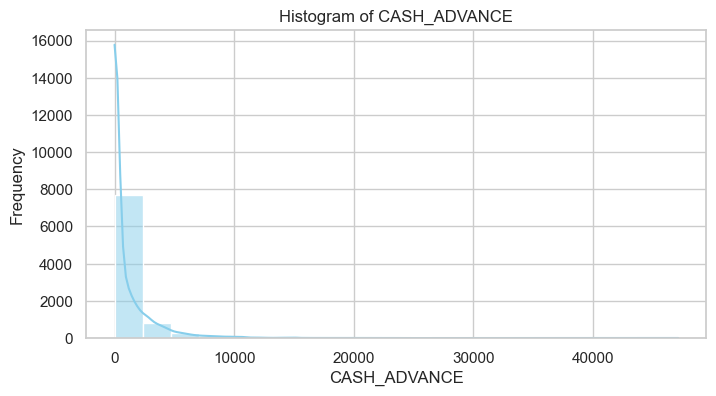

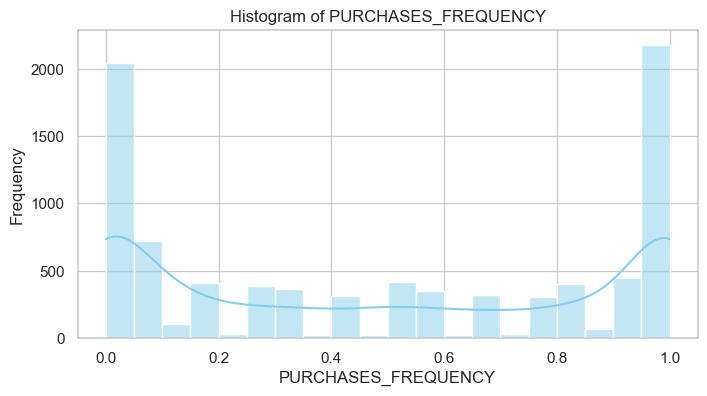

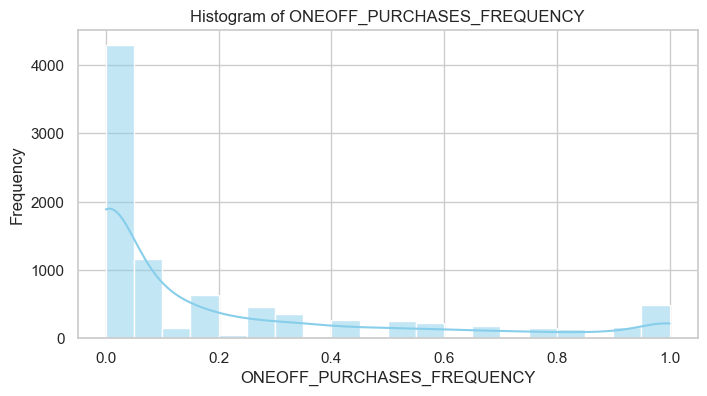

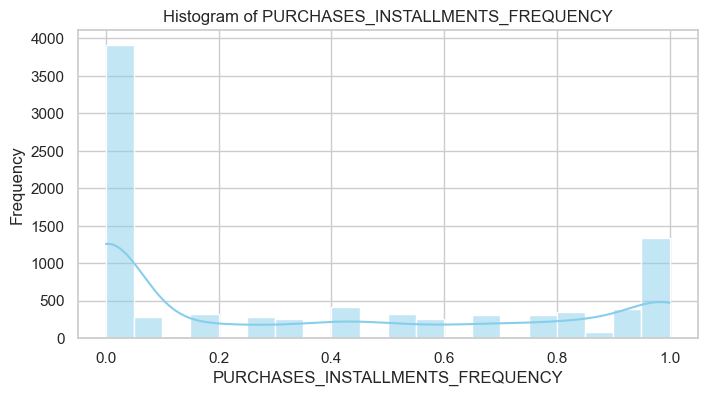

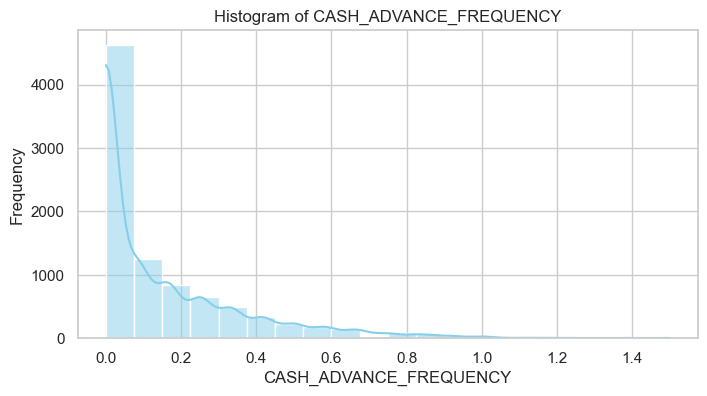

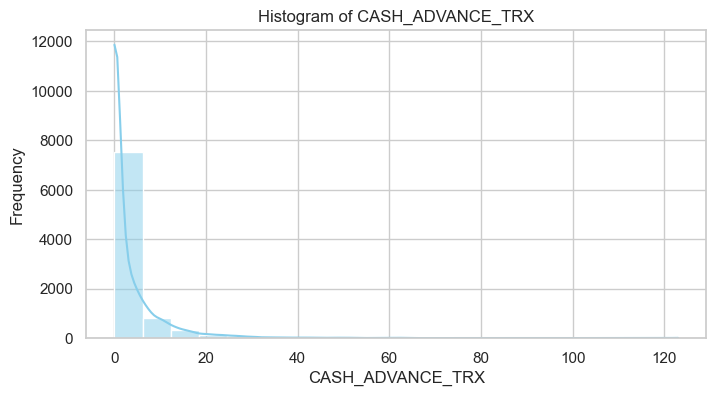

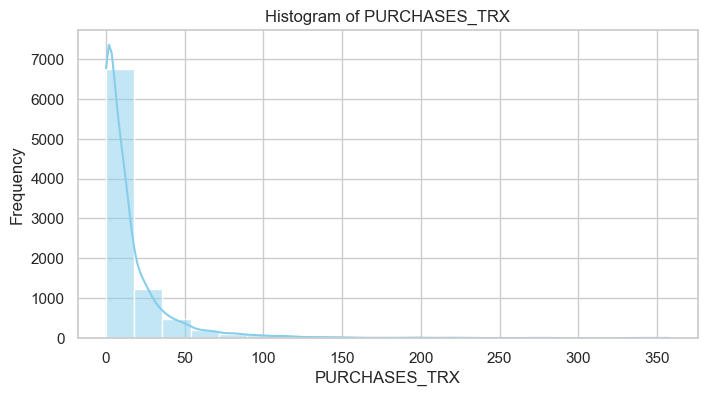

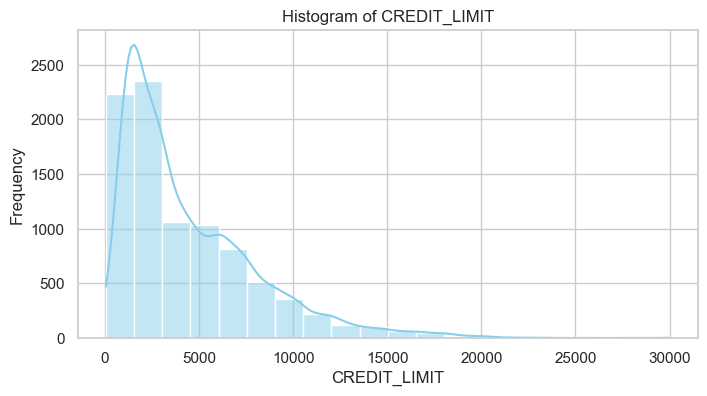

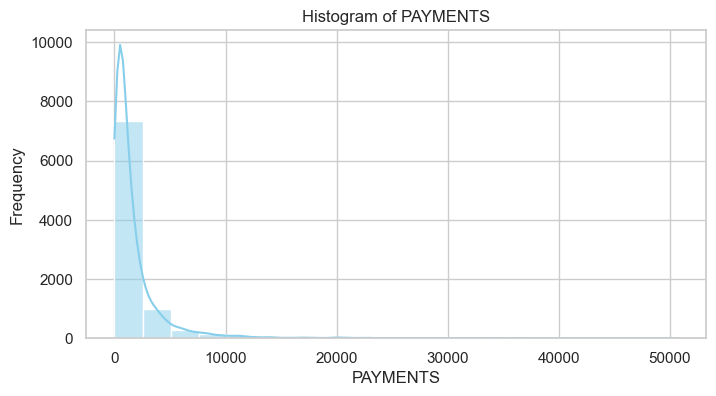

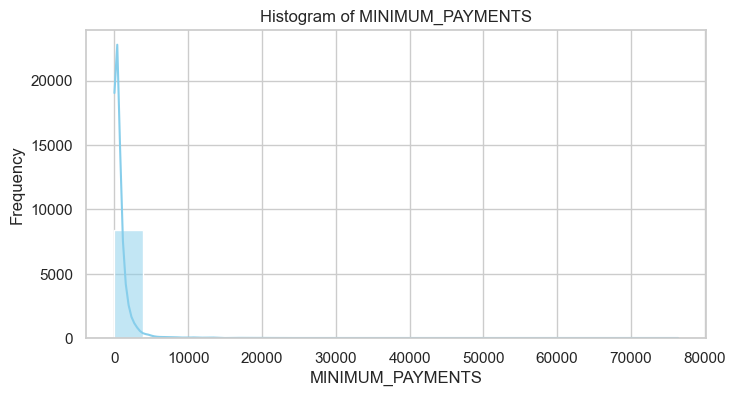

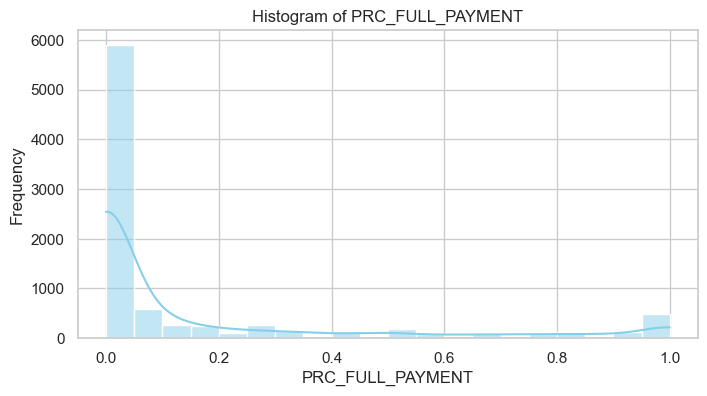

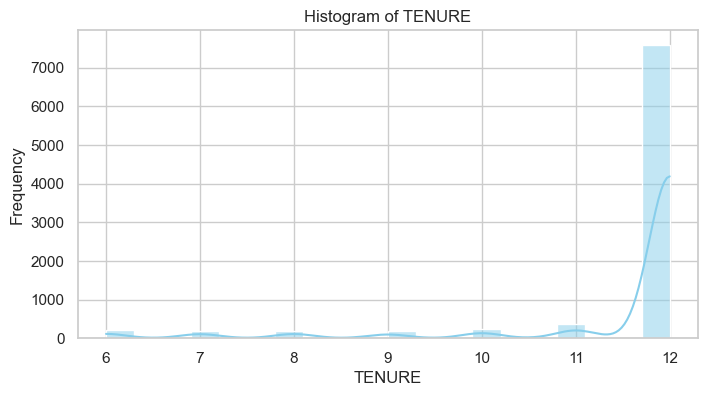

In [ ]:

sns.set(style="whitegrid")  # Optional: Set the style for the plots

# Create histograms for each numerical column
for column in df.select_dtypes(include=[np.number]):  # Select only numerical columns
    plt.figure(figsize=(8, 4))  # Set the figure size
    sns.histplot(df[column], kde=True, bins=20, color='skyblue')  # Create the histogram
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In general the data is imbalanced and skewed


In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are 2 features with missing values to drop them

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.notna().sum()

CUST_ID                             8636
BALANCE                             8636
BALANCE_FREQUENCY                   8636
PURCHASES                           8636
ONEOFF_PURCHASES                    8636
INSTALLMENTS_PURCHASES              8636
CASH_ADVANCE                        8636
PURCHASES_FREQUENCY                 8636
ONEOFF_PURCHASES_FREQUENCY          8636
PURCHASES_INSTALLMENTS_FREQUENCY    8636
CASH_ADVANCE_FREQUENCY              8636
CASH_ADVANCE_TRX                    8636
PURCHASES_TRX                       8636
CREDIT_LIMIT                        8636
PAYMENTS                            8636
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                    8636
TENURE                              8636
dtype: int64

### **Comments:**

* No null values
* No missing values.
* No duplicated values on df.
* No wrong value types.
* The Data frame is ready to go.

### **Data**
**c)**
* Drop the 'CUST_ID' column.
* Use seaborn.heatmap to display the correlation matrix of the features.
* Use seaborn.pairplot to generate scatter plots and histograms.
* Use markdown to make observations.



In [ ]:
# save the tag column
dftag = df[['CUST_ID']]
dftag.head()



CUST_ID
0  C10001
1  C10002
2  C10003
4  C10005
5  C10006

In [ ]:
# Drop the 'country' column
df.drop(columns=['CUST_ID'], inplace=True)
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8943     5.871712           0.500000      20.90             20.90   
8945    28.493517           1.000000     291.12              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
4      678.334763        244.791237          0.000000      12  
5     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8943    58.644883         43.473717          0.000000       6  
8945   325.594462         48.886365          0.500000       6  
8947    81

In [ ]:
dftag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CUST_ID  8636 non-null   object
dtypes: object(1)
memory usage: 134.9+ KB


In [ ]:
#Correlation matrix of features without country
correlation_matrix = df.corr()
correlation_matrix

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.310140   0.176083   
BALANCE_FREQUENCY                 0.310140           1.000000   0.122635   
PURCHASES                         0.176083           0.122635   1.000000   
ONEOFF_PURCHASES                  0.159985           0.095254   0.916780   
INSTALLMENTS_PURCHASES            0.122109           0.114739   0.679259   
CASH_ADVANCE                      0.495586           0.089036  -0.053760   
PURCHASES_FREQUENCY              -0.088459           0.228158   0.393000   
ONEOFF_PURCHASES_FREQUENCY        0.063832           0.187467   0.497384   
PURCHASES_INSTALLMENTS_FREQUENCY -0.069582           0.184159   0.316025   
CASH_ADVANCE_FREQUENCY            0.445307           0.181132  -0.124863   
CASH_ADVANCE_TRX                  0.382388           0.133265  -0.070277   
PURCHASES_TRX                     0.147887           0.183095   0.688732   
CREDIT_LIMIT                      0.535518           0.087682   0.358425   
PAYMENTS                          0.322830           0.039169   0.606782   
MINIMUM_PAYMENTS                  0.398669           0.132519   0.093842   
PRC_FULL_PAYMENT                 -0.333594          -0.156961   0.176447   
TENURE                            0.066987           0.104714   0.084545   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.159985                0.122109   
BALANCE_FREQUENCY                         0.095254                0.114739   
PURCHASES                                 0.916780                0.679259   
ONEOFF_PURCHASES                          1.000000                0.329650   
INSTALLMENTS_PURCHASES                    0.329650                1.000000   
CASH_ADVANCE                             -0.033244               -0.066099   
PURCHASES_FREQUENCY                       0.265460                0.441193   
ONEOFF_PURCHASES_FREQUENCY                0.524514                0.211829   
PURCHASES_INSTALLMENTS_FREQUENCY          0.128380                0.511130   
CASH_ADVANCE_FREQUENCY                   -0.086413               -0.136455   
CASH_ADVANCE_TRX                         -0.048705               -0.076716   
PURCHASES_TRX                             0.545313                0.626083   
CREDIT_LIMIT                              0.320613                0.258057   
PAYMENTS                                  0.570850                0.385391   
MINIMUM_PAYMENTS                          0.048741                0.132156   
PRC_FULL_PAYMENT                          0.129890                0.178440   
TENURE                                    0.063400                0.083346   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.495586            -0.088459   
BALANCE_FREQUENCY                     0.089036             0.228158   
PURCHASES                            -0.053760             0.393000   
ONEOFF_PURCHASES                     -0.033244             0.265460   
INSTALLMENTS_PURCHASES               -0.066099             0.441193   
CASH_ADVANCE                          1.000000            -0.218566   
PURCHASES_FREQUENCY                  -0.218566             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.090111             0.502123   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.178873             0.862338   
CASH_ADVANCE_FREQUENCY                0.629030            -0.316771   
CASH_ADVANCE_TRX                      0.656911            -0.208749   
PURCHASES_TRX                        -0.078449             0.567168   
CREDIT_LIMIT                          0.304161             0.121372   
PAYMENTS                              0.459342             0.100715   
MINIMUM_PAYMENTS                      0.140094             0.002979   
PRC_FULL_PAYMENT                     -0.158566             0.305393   
TENURE                               -0.073090        

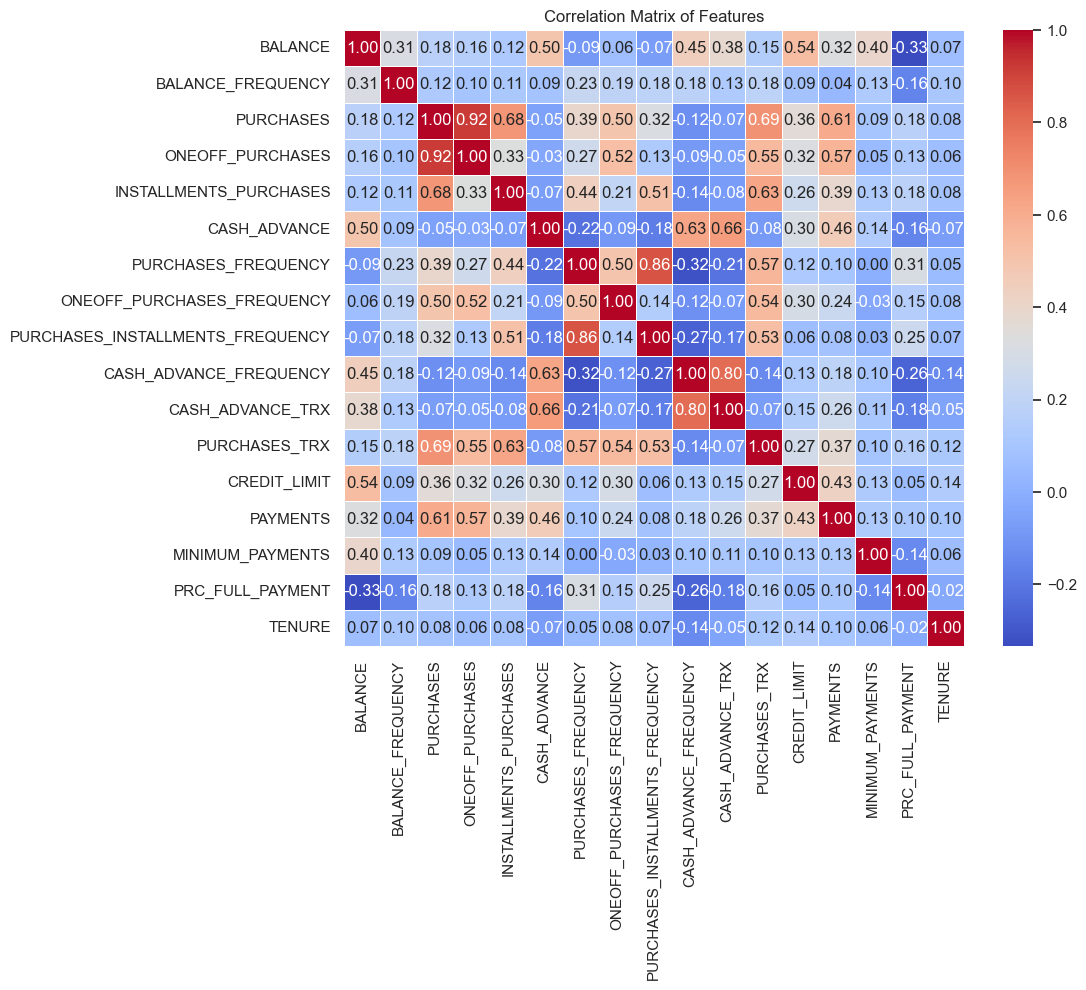

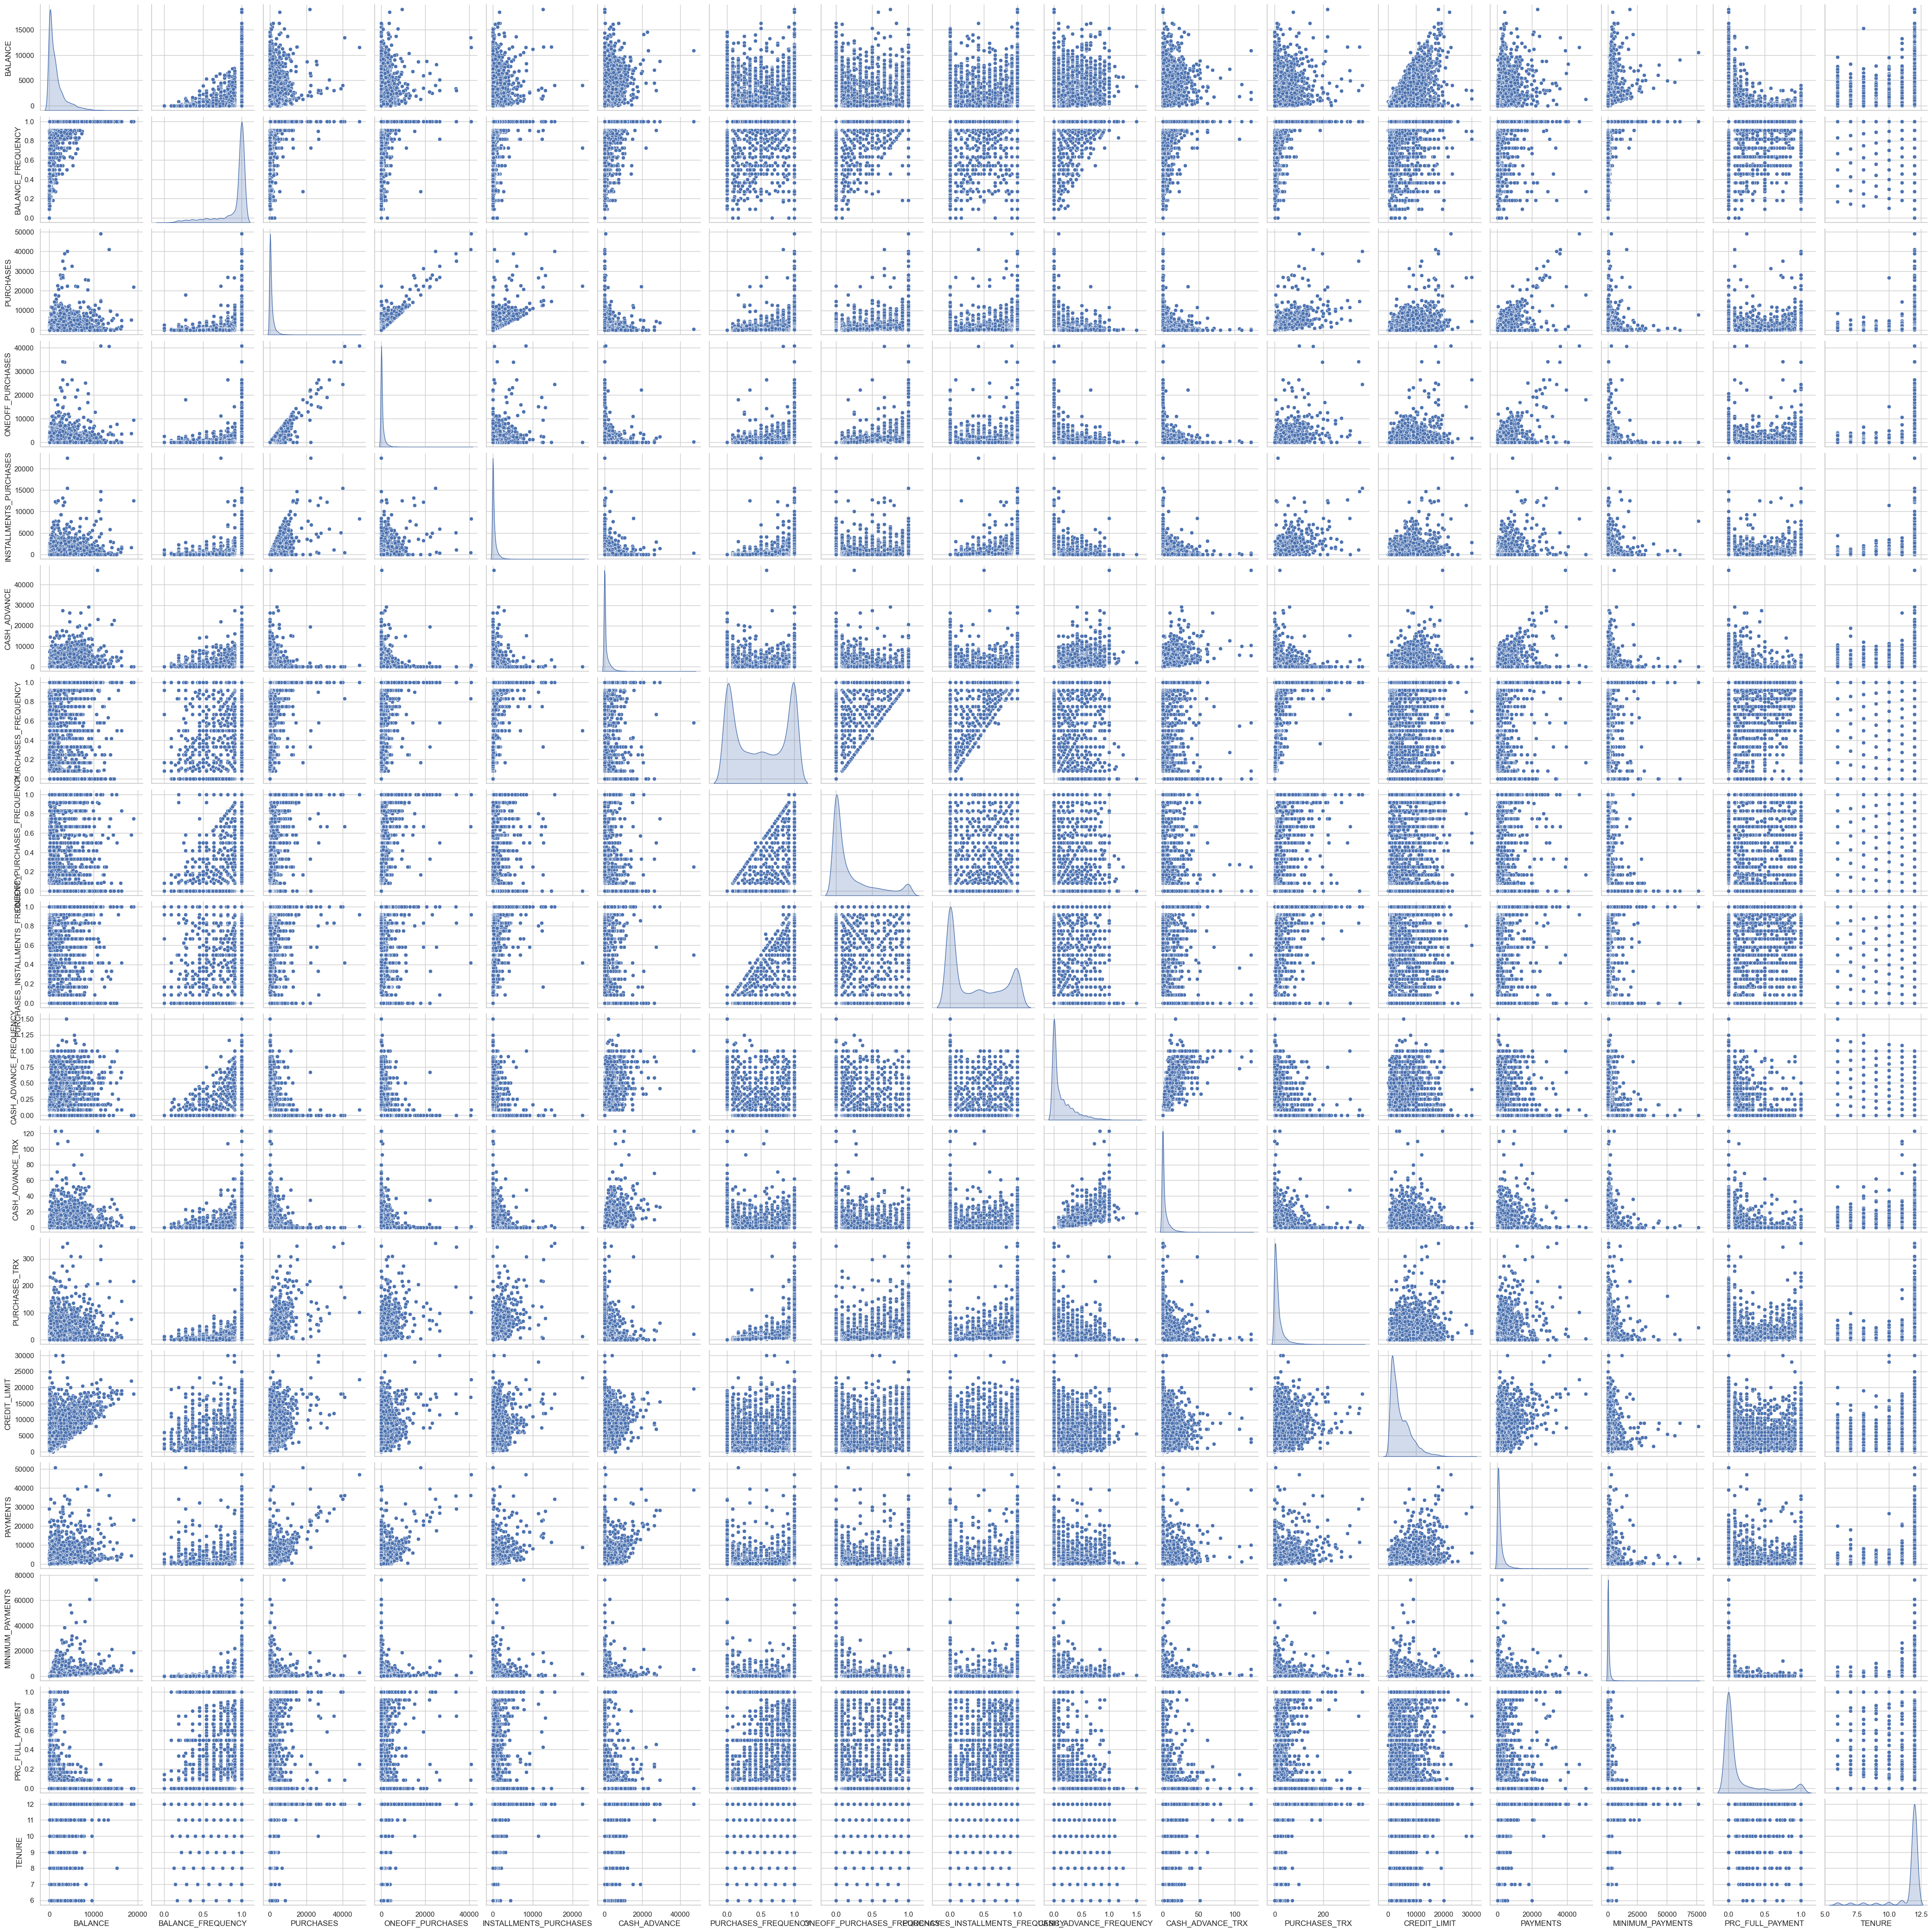

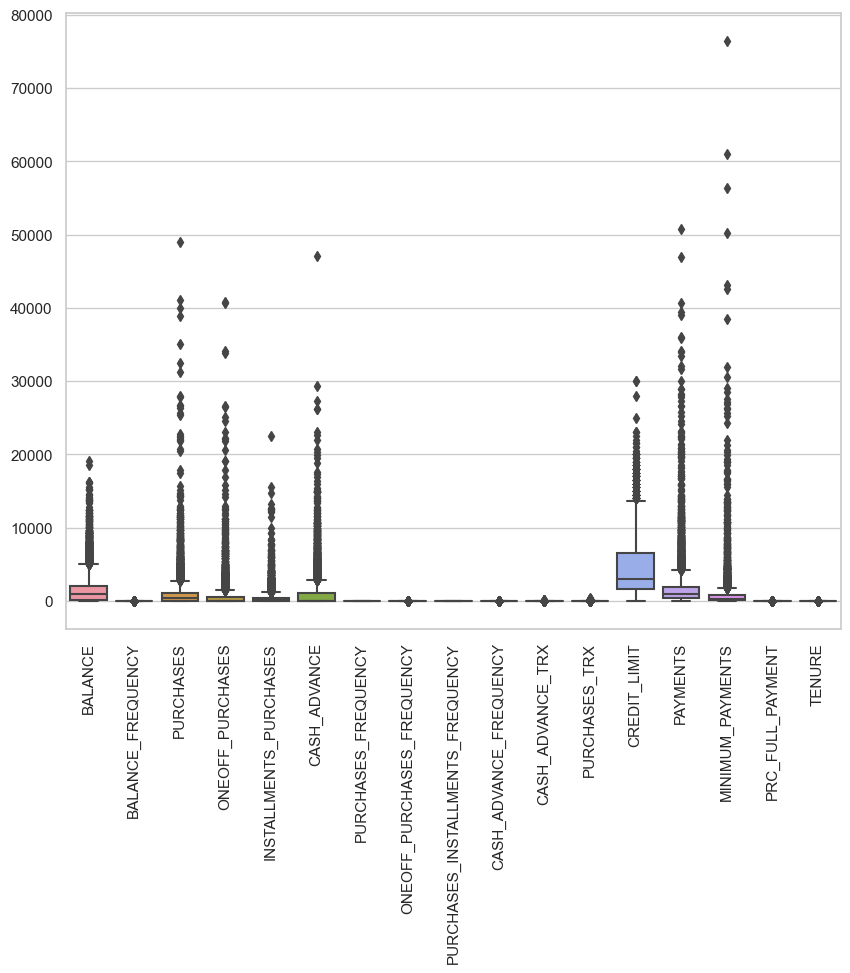

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Create a pairplot
sns.pairplot(df, diag_kind='kde')
plt.show()

# Create a boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


### **Comments**
From above we can conclude that:
Relationships:
Strong relationships between:
* Credit Limit, cash advance and cash advance transactions with Balance. People who has a good balance get a better credit limit, people who has a better credit limit tend to spend more on cash.
* Installment and purchase transactions. People who spend more with credit card tend to apply for installments.
Boxplot shows all features have outliers,


### **Modeling**
**a)**
* Use sklearn.preprocessing.MinMaxScaler to scale the data.
* Print the header.


In [ ]:
# Import the StandardScaler class from scikit-learn's preprocessing module
from sklearn.preprocessing import MinMaxScaler

# Initialize the StandardScaler to maintain consistency in the model's predictions.
scaler = MinMaxScaler()

# Fit and transform the data using the StandardScaler
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Print the header of the scaled DataFrame
scaled_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.042940           1.000000   0.000326          0.000393   
4  0.095038           1.000000   0.027188          0.000000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.004240      0.000000             0.166667   
1                0.000000      0.136685             0.000000   
2                0.000000      0.000000             1.000000   
3                0.000000      0.000000             0.083333   
4                0.059257      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000           0.00000       0.005587      0.031720   
1                0.166667           0.03252       0.000000      0.232053   
2                0.000000           0.00000       0.033520      0.248748   
3                0.000000           0.00000       0.002793      0.038397   
4                0.000000           0.00000       0.022346      0.058431   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  0.003978          0.001826          0.000000     1.0  
1  0.080892          0.014034          0.222222     1.0  
2  0.012263          0.008210          0.000000     1.0  
3  0.013373          0.003204          0.000000     1.0  
4  0.027602          0.031506          0.000000     1.0

### **Modeling**
**b)**
* Use sklearn.cluster.AgglomerativeClustering to cluster the data agglomeratively.
* Create at least 10 different models with different choices for hyperparameters: n_clusters, metric, linkage, and distance_threshold.
* Calculate the silhouette score for each and tabulate the results.

In [ ]:
# Agglomerative clusterin
X = scaled_df

# setting up the hyperparameters combinations
# set some options for number of clusters
n_clusters_values = [3, 4]

# set the 2 distance metrics
metrics = ['euclidean', 'manhattan']

# set all the linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

# Create a new DataFrame to store the results
results_df = pd.DataFrame(columns=['n_clusters', 'metric', 'linkage', 'Silhouette Score'])

# Loop through different hyperparameters and calculate silhouette scores
model_num = 0

for n_clusters in n_clusters_values:
    for metric in metrics:
        for linkage in linkage_methods:
            if (linkage == 'ward' and metric != 'euclidean'):
                continue

            # Create and fit the Agglomerative Clustering model
            model = AgglomerativeClustering(n_clusters=n_clusters, affinity=metric, linkage=linkage)
            cluster_labels = model.fit_predict(X)

            # Calculate the silhouette score
            silhouette_avg = silhouette_score(X, cluster_labels)

            # Store the results in the DataFrame
            results_df.loc[model_num] = [n_clusters, metric, linkage, silhouette_avg]
            model_num += 1

            print(results_df) #print with each interaction to watch if the model is running well
            print(cluster_labels)
            print('-------------------------------------------')




  n_clusters     metric linkage  Silhouette Score
0          3  euclidean    ward          0.332388
[0 0 1 ... 2 0 2]
-------------------------------------------
  n_clusters     metric   linkage  Silhouette Score
0          3  euclidean      ward          0.332388
1          3  euclidean  complete          0.368642
[1 1 0 ... 0 1 1]
-------------------------------------------
  n_clusters     metric   linkage  Silhouette Score
0          3  euclidean      ward          0.332388
1          3  euclidean  complete          0.368642
2          3  euclidean   average          0.384426
[0 0 0 ... 0 0 0]
-------------------------------------------
  n_clusters     metric   linkage  Silhouette Score
0          3  euclidean      ward          0.332388
1          3  euclidean  complete          0.368642
2          3  euclidean   average          0.384426
3          3  euclidean    single          0.376454
[0 0 0 ... 0 0 0]
-------------------------------------------
  n_clusters     metric   li

In [ ]:
# Display the results_df sorted by the Silhouette Score
results_df_sorted = results_df.sort_values(by='Silhouette Score', ascending=False)
results_df_sorted

n_clusters     metric   linkage  Silhouette Score
2           3  euclidean   average          0.384426
3           3  euclidean    single          0.376454
6           3  manhattan    single          0.376454
13          4  manhattan    single          0.374080
5           3  manhattan   average          0.369851
1           3  euclidean  complete          0.368642
0           3  euclidean      ward          0.332388
10          4  euclidean    single          0.320580
8           4  euclidean  complete          0.319195
9           4  euclidean   average          0.317368
11          4  manhattan  complete          0.300201
12          4  manhattan   average          0.269973
7           4  euclidean      ward          0.261571
4           3  manhattan  complete          0.234445

In [ ]:
# Find the row with the highest silhouette score (the best model)
best_model_row = results_df.loc[results_df['Silhouette Score'].idxmax()]

# Extract the hyperparameters of the best model
best_n_clusters = int(best_model_row['n_clusters'])
best_metric = best_model_row['metric']
best_linkage = best_model_row['linkage']
best_silhouette_score = best_model_row['Silhouette Score']

# Print the best model and its hyperparameters
print("Best Aggregation Model:")
print(f"Number of Clusters: {best_n_clusters}")
print(f"Metric: {best_metric}")
print(f"Linkage Method: {best_linkage}")
print(f"Best Silhouette Score: {best_silhouette_score:.4f}")


Best Aggregation Model:
Number of Clusters: 3
Metric: euclidean
Linkage Method: average
Best Silhouette Score: 0.3844


In [ ]:
silhouete_scores = results_df['Silhouette Score'].values
print(silhouete_scores)

[0.33238818 0.36864213 0.38442616 0.37645366 0.23444524 0.36985105
 0.37645366 0.26157144 0.31919525 0.31736839 0.32058025 0.30020122
 0.26997302 0.37408013]



Best Silhouette Score:
Model 3 - Silhouette Score: 0.3844


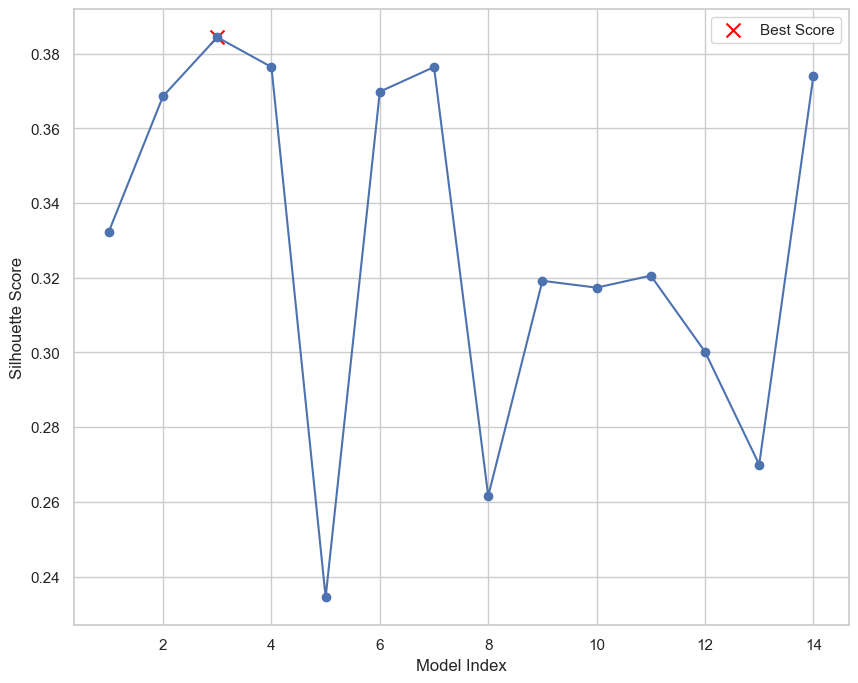

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Plot the silhouette scores
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(silhouete_scores) + 1), silhouete_scores, marker='o')
plt.xlabel('Model Index')
plt.ylabel('Silhouette Score')

# Find the index of the best silhouette score
best_score_index = np.argmax(silhouete_scores)
best_score = silhouete_scores[best_score_index]

# Highlight the best silhouette score point
plt.scatter(best_score_index + 1, best_score, color='red', marker='x', s=100, label='Best Score')

# Print the best silhouette score
print("\nBest Silhouette Score:")
print(f"Model {best_score_index + 1} - Silhouette Score: {best_score:.4f}")

plt.legend()
plt.show()


#### **Comments**
The best score is the third iteraction with the next parameters:
* n_clusters: 3 (data is better divided into 3 clusters, good cohesion and separation with each other)
* linkage: average (well balanced clusters, )
* affinity: euclidean (the data fit to continuous features distribution)

In aglomerative Clustering, the best model is given tipically on the meassure of the cluster quality, which depends on the data. The silohuete score give us the quality of clustering.It means the points are better represented by each chosen cluster than other options.
Building upon this criteria the best model is the third one described above


### **Modeling**
**c)**
* Use scipy.cluster.hierarchy.fcluster to cluster the data divisively.
* Create at least 10 different models with different choices for hyperparameters: t, criterion, and depth.
* Calculate the silhouette score for each and tabulate the results.


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
# Replace X or df with your actual dataset
X_fcluster = scaled_df  # Make sure X_fcluster is defined

# Setting up the hyperparameters combinations
threshold_values = [3, 4, 5]
linkage_criteria = ['ward', 'complete', 'average', 'single']
depth_values = [2, 3, 4, 5]

# Create a new DataFrame to store the results
results_df_fcluster = pd.DataFrame(columns=['Threshold', 'Linkage', 'Depth', 'Silhouette Score fcluster'])

# Loop through different hyperparameter combinations and calculate cluster labels
model_num = 0
max_models = 25  # To avoid taking too much time and processing power while testing the model

for t in threshold_values:
    for linkage_method in linkage_criteria:  # Use 'linkage_method' as the variable name
        for depth in depth_values:
            # Create the hierarchical clustering linkage matrix
            Z = linkage(X_fcluster, method=linkage_method)  # Use 'linkage_method' variable

            # Perform divisive clustering using fcluster
            cluster_labels_fcluster = fcluster(Z, t, criterion='distance', depth=depth)

            # Check if there are at least two clusters
            unique_labels = np.unique(cluster_labels_fcluster)
            if len(unique_labels) >= 2:
                # Calculate the silhouette score
                silhouette_avg = silhouette_score(X_fcluster, cluster_labels_fcluster)

                # Store the results in the DataFrame
                results_df_fcluster.loc[model_num] = [t, linkage_method, depth, silhouette_avg]
                model_num += 1

                print(results_df_fcluster)  # Print with each interaction to watch if the model is running well
                print(cluster_labels_fcluster)
                print('-------------------------------------------')


                if model_num >= max_models:
                    break
        if model_num >= max_models:
            break
    if model_num >= max_models:
        break

# Display the results_fcluster in a tabular format
print(results_df_fcluster)


  Threshold Linkage Depth  Silhouette Score fcluster
0         3    ward     2                   0.154013
[22 22 47 ... 32 13 29]
-------------------------------------------
  Threshold Linkage Depth  Silhouette Score fcluster
0         3    ward     2                   0.154013
1         3    ward     3                   0.154013
[22 22 47 ... 32 13 29]
-------------------------------------------
  Threshold Linkage Depth  Silhouette Score fcluster
0         3    ward     2                   0.154013
1         3    ward     3                   0.154013
2         3    ward     4                   0.154013
[22 22 47 ... 32 13 29]
-------------------------------------------
  Threshold Linkage Depth  Silhouette Score fcluster
0         3    ward     2                   0.154013
1         3    ward     3                   0.154013
2         3    ward     4                   0.154013
3         3    ward     5                   0.154013
[22 22 47 ... 32 13 29]
------------------------------

In [ ]:
# Display the results_df sorted by the Silhouette Score
results_df_fcluster_sorted = results_df_fcluster.sort_values(by='Silhouette Score fcluster', ascending=False)
results_df_fcluster_sorted

Threshold   Linkage Depth  Silhouette Score fcluster
4          3  complete     2                   0.376460
5          3  complete     3                   0.376460
6          3  complete     4                   0.376460
7          3  complete     5                   0.376460
12         5      ward     2                   0.213100
13         5      ward     3                   0.213100
14         5      ward     4                   0.213100
15         5      ward     5                   0.213100
8          4      ward     2                   0.160847
9          4      ward     3                   0.160847
10         4      ward     4                   0.160847
11         4      ward     5                   0.160847
0          3      ward     2                   0.154013
1          3      ward     3                   0.154013
2          3      ward     4                   0.154013
3          3      ward     5                   0.154013

In [ ]:
# Find the row with the highest silhouette score (the best model)
best_model_row = results_df_fcluster.loc[results_df_fcluster['Silhouette Score fcluster'].idxmax()]

# Extract the hyperparameters of the best model
best_Threshold = int(best_model_row['Threshold'])
best_Linkage = best_model_row['Linkage']
best_Depth = best_model_row['Depth']
best_Silhouette_score = best_model_row['Silhouette Score fcluster']

# Print the best model and its hyperparameters
print("Best fcluster data divisively Model:")
print(f"Threshold: {best_Threshold}")
print(f"Linkage: {best_Linkage}")
print(f"Depth: {best_Depth}")
print(f"Best Silhouette Score fcluster: {best_Silhouette_score:.4f}")

Best fcluster data divisively Model:
Threshold: 3
Linkage: complete
Depth: 2
Best Silhouette Score fcluster: 0.3765


In [ ]:
# Labels with fcluster best model
#Set the hyperparameters
threshold = 3
linkage_method = 'complete'
depth = 2

# Create the hierarchical clustering linkage matrix
Z = linkage(X_fcluster, method=linkage_method)

# Perform divisive clustering using fcluster
cluster_labels_fcluster = fcluster(Z, t=threshold, criterion='distance', depth=depth)
cluster_labels_fcluster


array([1, 1, 2, ..., 2, 1, 1], dtype=int32)

In [ ]:
silhouette_scores_fcluster = results_df_fcluster['Silhouette Score fcluster'].values
print(silhouette_scores_fcluster)

[0.15401343 0.15401343 0.15401343 0.15401343 0.37645973 0.37645973
 0.37645973 0.37645973 0.16084728 0.16084728 0.16084728 0.16084728
 0.21310027 0.21310027 0.21310027 0.21310027]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


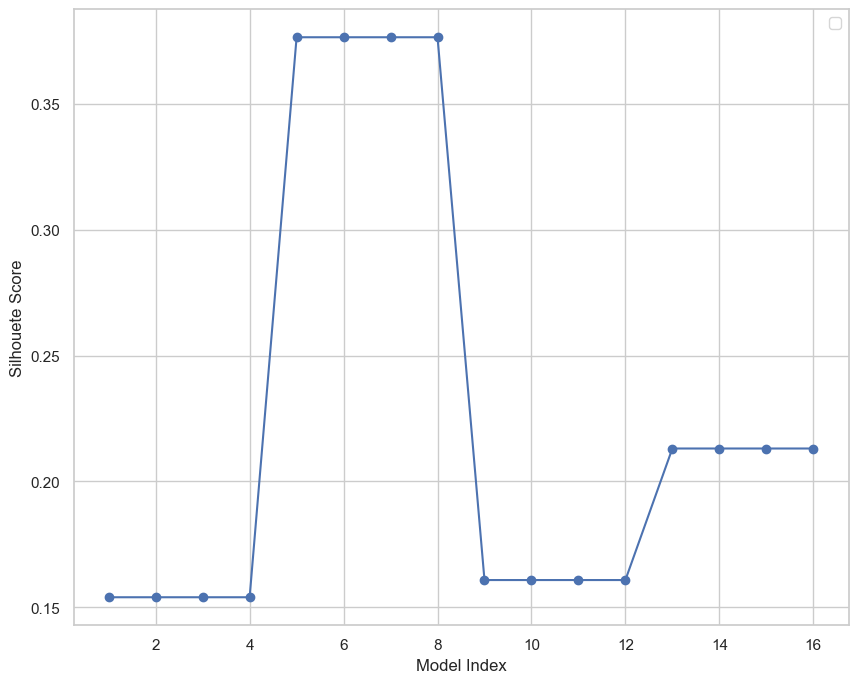

In [ ]:
# Plot the silhouette scores for fcluster
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(silhouette_scores_fcluster) + 1), silhouette_scores_fcluster, marker='o')
plt.xlabel('Model Index')
plt.ylabel('Silhouete Score')

# Find the index of the best silhouette score
best_score_index = np.argmax(silhouete_scores)
best_score = silhouete_scores[best_score_index]

plt.legend()
plt.show()


#### **Comments**
The best score is the sevemth iteraction with the next parameters:
* Threshold: 3 (clusters are divided until the distance is more than 3. this make balance between fine-grained clusters and coarse clusters with less meaningful separation)
* linkage: complete (well-separated clusters with good internal cohesion)
* depth: 2, (the tree is dividen into two layers, this depth is relativeltily shaloww, which prevents over splitting)

Those parameters are well suited and make balance between granularity nd quality.
the avobe graph sows thet the best model depends mainly on the first hyperparameters, depth could change but the silohuete score remains the same

### **Modeling**
**d)**
Select the best model for the use case and justify your choice in markdown.

The best model is Agglomerative Clustering, the silhouette Score is higher, the model spend less computational resources, It goes from the simpler to more complex.

In general both models have similar scores and can be used for this specific data set.


### **Conclusions**
### **part a)**
* Based on your analysis in step 1, choose a pair of columns and generate a scatter plot of the data.
* Use the model predictions to colour the points according to the cluster they belong to.
* Use markdown to comment on the plot.

In [ ]:
# Print the best model and its hyperparameters
print("Best Model:")
print(f"Number of Clusters: {best_n_clusters}")
print(f"Metric: {best_metric}")
print(f"Linkage Method: {best_linkage}")
print(f"Best Silhouette Score: {best_silhouette_score:.4f}")

Best Model:
Number of Clusters: 3
Metric: euclidean
Linkage Method: average
Best Silhouette Score: 0.3844


In [ ]:
# Create and fit the Agglomerative Clustering model
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels = model.fit_predict(X)
cluster_labels


array([0, 0, 1, ..., 2, 0, 2], dtype=int64)

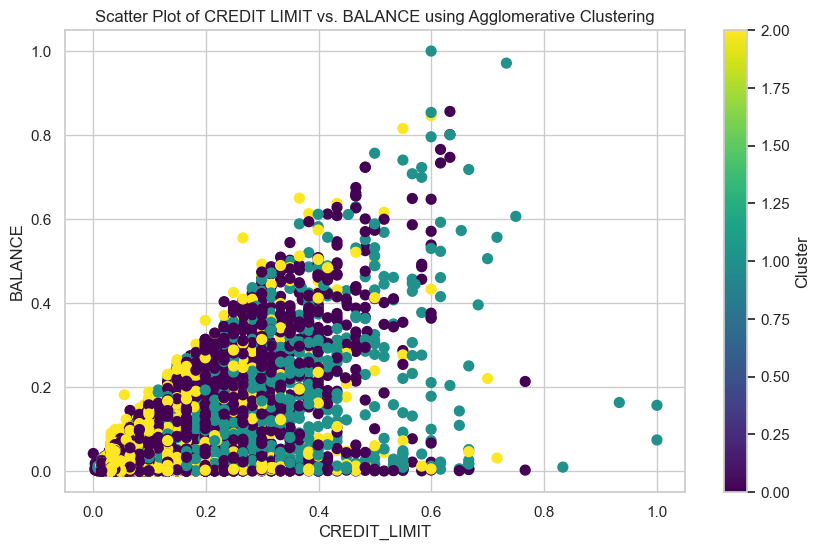

In [ ]:
# Choose the pair of columns for the scatter plot using agglomerative
x_column = scaled_df['CREDIT_LIMIT']
y_column = scaled_df['BALANCE']


plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(x_column,y_column , c=cluster_labels, cmap='viridis', s=50)

# Add labels and title
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('BALANCE')
plt.title('Scatter Plot of CREDIT LIMIT vs. BALANCE using Agglomerative Clustering')

# Add a colorbar for cluster labels
plt.colorbar(label='Cluster')

# Show the plot
plt.show()

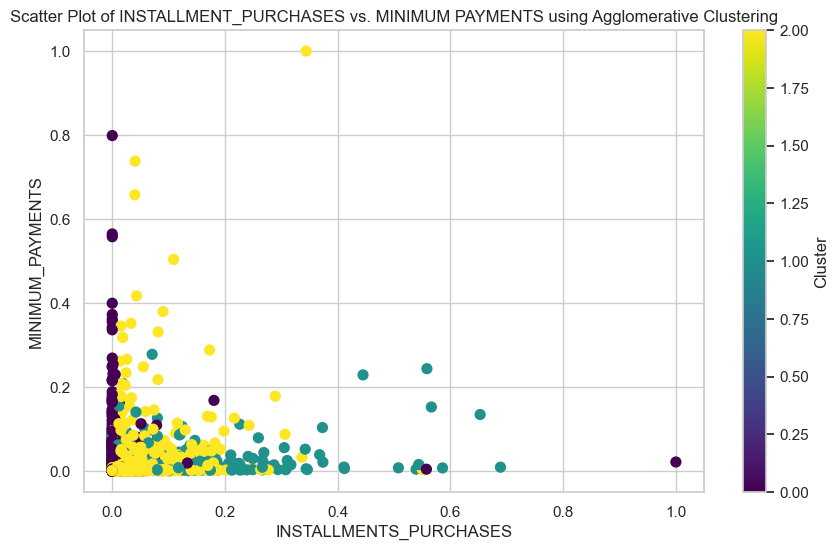

In [ ]:
# Choose the pair of columns for the scatter plot using agglomerative
x_column = scaled_df['INSTALLMENTS_PURCHASES']
y_column = scaled_df['MINIMUM_PAYMENTS']


plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(x_column,y_column , c=cluster_labels, cmap='viridis', s=50)

# Add labels and title
plt.xlabel('INSTALLMENTS_PURCHASES')
plt.ylabel('MINIMUM_PAYMENTS')
plt.title('Scatter Plot of INSTALLMENT_PURCHASES vs. MINIMUM PAYMENTS using Agglomerative Clustering')

# Add a colorbar for cluster labels
plt.colorbar(label='Cluster')

# Show the plot
plt.show()

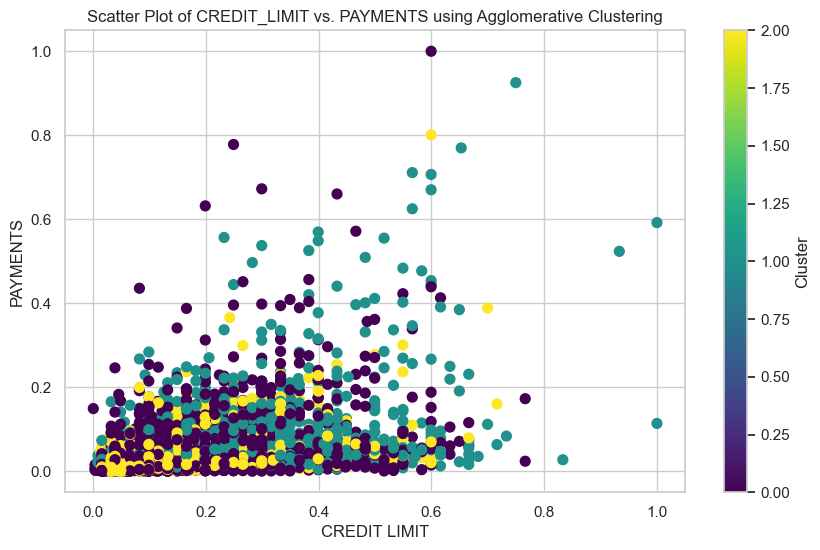

In [ ]:
# Choose the pair of columns for the scatter plot using agglomerative
x_column = scaled_df['CREDIT_LIMIT']
y_column = scaled_df['PAYMENTS']


plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(x_column,y_column , c=cluster_labels, cmap='viridis', s=50)

# Add labels and title
plt.xlabel('CREDIT LIMIT')
plt.ylabel('PAYMENTS')
plt.title('Scatter Plot of CREDIT_LIMIT vs. PAYMENTS using Agglomerative Clustering')

# Add a colorbar for cluster labels
plt.colorbar(label='Cluster')

# Show the plot
plt.show()

**Comments:**
* For the best model cluster 0 is taken the majority of the dataset.
* Credit Limit grows as same speed as balance which means people is spending more while thir balance grow, this is a good oportunity for selling more products to the people in cluster 0.
* Credit limit is growing but paymens are remaining almost the same, this is an oportunity for sellers to ctch those customers and advice about new products, to get more consumptions and let the payments grow in the same rate.
* Installments are remaining low with minimum payments. Customers who dont apply for installments just pay the minimum each month, the bank is earning loan rates but the market is not growing, this is an oportunity for sell more products with innovative thinking to take the attention of those customers.


### **Conclusions**
### **part b)**
* Generate a histogram that shows the number of elements in each cluster.
* Use markdown to comment on the histogram.

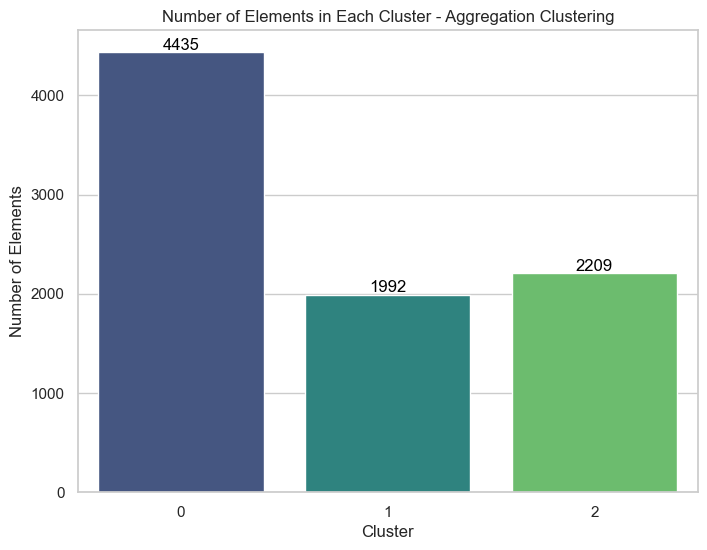

In [ ]:
# Count the number of elements in each cluster
unique_labels, counts = np.unique(cluster_labels, return_counts=True)

# Create a DataFrame to hold the cluster labels and counts
df_clusters = pd.DataFrame({'Cluster Labels': unique_labels, 'Count': counts})

# Create a bar plot using Seaborn with different colors
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Cluster Labels', y='Count', data=df_clusters, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Number of Elements')
plt.title('Number of Elements in Each Cluster - Aggregation Clustering')

# Add tags with the number of elements above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


**Comments**
The large cluster is cluster 0, the others are almost the same size


### **Conclusions**
### **part c)**
* Create a separate dataframe for each cluster. Use pandas.DataFrame.describe to describe each cluster.
* Provide a written conclusion to describe each group of customers to the marketing strategy team.

In [ ]:
# Add the cluster labels as a new column to the DataFrame
df['Cluster Labels'] = cluster_labels

# Filter the DataFrame to show only rows with Cluster Labels equal to 0
cluster_0_df = df[df['Cluster Labels'] == 0]

# Display the resulting DataFrame
print(f"Cluster 0 - Number of Elements: {len(cluster_0_df)}"
        f"\nCluster 0 - Percentage of Elements: {len(cluster_0_df) / len(df) * 100:.2f}%")

print(cluster_0_df.describe())

Cluster 0 - Number of Elements: 4435
Cluster 0 - Percentage of Elements: 51.35%
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   4435.000000        4435.000000   4435.000000       4435.000000   
mean    1755.953083           0.844908    276.499457        200.699069   
std     2093.985067           0.250974    842.953595        723.045434   
min        0.000000           0.000000      0.000000          0.000000   
25%      235.848666           0.727273      0.000000          0.000000   
50%     1103.988247           1.000000     50.000000          0.000000   
75%     2342.063035           1.000000    288.610000        154.440000   
max    16304.889250           1.000000  22500.000000      22101.780000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             4435.000000   4435.000000          4435.000000   
mean                75.998449   1360.156870             0.143944   
std                434.662517   2275.050807      

In [ ]:
# Filter the DataFrame to show only rows with Cluster Labels equal to 0
cluster_1_df = df[df['Cluster Labels'] == 1]

# Display the resulting DataFrame
print(f"Cluster 1 - Number of Elements: {len(cluster_1_df)}"
        f"\nCluster 1 - Percentage of Elements: {len(cluster_1_df) / len(df) * 100:.2f}%")

cluster_1_df.describe()

Cluster 1 - Number of Elements: 1992
Cluster 1 - Percentage of Elements: 23.07%


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1992.000000        1992.000000   1992.000000       1992.000000   
mean    1918.639997           0.979527   2796.936431       1961.109644   
std     2319.392808           0.069124   3634.606623       2904.380509   
min        0.413670           0.181818      8.400000          0.000000   
25%      366.104733           1.000000    960.730000        631.235000   
50%     1108.914638           1.000000   1830.385000       1187.325000   
75%     2535.581095           1.000000   3311.205000       2273.007500   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1992.000000   1992.000000          1992.000000   
mean               835.969834    675.228686             0.861309   
std               1390.742678   2143.106264             0.179463   
min                  0.000000      0.000000             0.333333   
25%                 60.427500      0.000000             0.750000   
50%                403.265000      0.000000             1.000000   
75%               1061.875000    386.792936             1.000000   
max              15497.190000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1992.000000                       1992.000000   
mean                     0.663900                          0.533410   
std                      0.262446                          0.388382   
min                      0.000000                          0.000000   
25%                      0.416667                          0.083333   
50%                      0.666667                          0.583333   
75%                      0.916667                          0.916667   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1992.000000       1992.000000    1992.000000   1992.000000   
mean                 0.094411          2.444779      38.922691   6202.369579   
std                  0.177520          6.418047      37.724410   4233.896185   
min                  0.000000          0.000000       5.000000    300.000000   
25%                  0.000000          0.000000      15.000000   3000.000000   
50%                  0.000000          0.000000      27.000000   5700.000000   
75%                  0.090909          2.000000      48.000000   8500.000000   
max                  1.000000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  \
count   1992.000000       1992.000000       1992.000000  1992.000000   
mean    2932.096247        800.968899          0.203628    11.917671   
std     3982.080446       1349.033956          0.334715     0.388495   
min       18.496532          3.197940          0.000000     8.000000   
25%      915.514433        190.637559          0.000000    12.000000   
50%     1756.184213        363.534624          0.000000    12.000000   
75%     3425.692960        928.413503          0.250000    12.000000   
max    46930.598240      21235.065300          1.000000    12.000000   

       Cluster Labels  
count          1992.0  
mean              1.0  
std               0.0  
min               1.0  
25%               1.0  
50%               1.0  
75%               1.0  
max               1.0

In [ ]:
# Filter the DataFrame to show only rows with Cluster Labels equal to 0
cluster_2_df = df[df['Cluster Labels'] == 2]

# Display the resulting DataFrame
print(f"Cluster 2 - Number of Elements: {len(cluster_2_df)}"
        f"\nCluster 2 - Percentage of Elements: {len(cluster_2_df) / len(df) * 100:.2f}%")

print(cluster_2_df.describe())

Cluster 2 - Number of Elements: 2209
Cluster 2 - Percentage of Elements: 25.58%
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   2209.000000        2209.000000   2209.000000       2209.000000   
mean    1004.343764           0.919483    931.586455        193.435057   
std     1738.471117           0.160686   1029.927781        530.370577   
min        0.000000           0.000000     12.000000          0.000000   
25%       51.581189           0.909091    320.000000          0.000000   
50%      218.948323           1.000000    582.280000          0.000000   
75%     1204.102388           1.000000   1155.000000        126.240000   
max    16115.596400           1.000000  12375.000000       6520.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             2209.000000   2209.000000          2209.000000   
mean               738.840978    547.011569             0.873398   
std                819.335074   1582.564461      

### **Conclusions**
### **part d)**

* Provide a written conclusion to describe each group of customers to the marketing strategy team.

**Conclution:**
* Cluster 0 represents the the majority of customers, with a 51%.
*Spending pattern:* memebers tend to have higher balances in their accounts, it meants they have financial resources.
*Credit Usage:* this group dont get use to purchase frequently. They prefer to purchase in installments.
*Cash Advances:* moderate level of spending with cash advance, they prefer to purchase with credit card

* Cluster 1 made up 23%
*Tenure*: this gruup tend to long term relationships
*Cash Adcance:* they dont use cash advance, prefer to use another alternatives.
*Purchase frequency:* They like purchase all the time, this gruop has the hughest rate purchasing.
*Credit Usage:* They have a high credit limit and pay always on time and higher amounts
*Purchase behaviour:* customers tebd to make one-off and installment purchases

* Cluster 2 accounts for 26% of the total elements
*Financial behaviour:* Customers exhibit a high balance frequency
*Purchase behaviour:* the on-off purchase is relatively low, they are adept to purchase with installments
*Credit score:* they use cash advance and have high credit limit
*Purchase Frequency:* high purchase frequency, but on-off has low rate, they prefer installments
*Tenure:* Customers are new

**Recomendations for Mkt Team:**

For customers in Cluster 0, It has been observed a consistent pattern of frequent purchasing behavior. To further engage this segment, we recommend considering incentives to encourage them to pay their card balances in full. This could be achieved through loyalty programs, automatic remainders for pay their balance monthly, perks or cashback offers, motivating them to continue their active purchasing habits.

Customers in Cluster 1 demonstrate a strong appetite for making purchases. To capitalize on this, The suggestion is evaluating the possibility of increasing their credit limits, offer some discounts like 3 months with no charge purchasing. This adjustment would allow them to make more substantial purchases, considering their commendable frequency of transactions.

Customers in Cluster 2 have potential for growth. The recommendation is considering credit limit increases and targeted promotional campaigns to incentivize them to make more purchases. Tailored advertisements and special offers could encourage these customers to take advantage of their credit limits and engage in more buying activities.
